In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Creation d'une liste des noms de colonnes pour l'importation du dataframe

In [2]:
liste = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status','occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salaire']

In [3]:
#dataframe data qui sera modifié ensuite
data = pd.read_csv('adult.data', sep=' *, *', names=liste, index_col=False, engine='python', na_values='?' )


In [4]:
#dataframe df qui restera brut, au cas ou pour plus loin
df = pd.read_csv('adult.data', sep=' *, *', names=liste, index_col=False, engine='python') #, na_values='?' 

In [5]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salaire
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
salaire           32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
data.shape

(32561, 15)

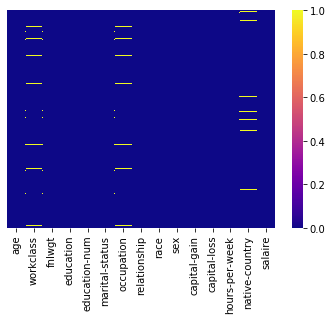

In [9]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='plasma');

In [10]:
# suppression de la colonne fnlwgt qui ne sert à rien
data.drop('fnlwgt',axis=1, inplace= True)

In [11]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salaire'],
      dtype='object')

In [12]:
data['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [13]:
data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [14]:
data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

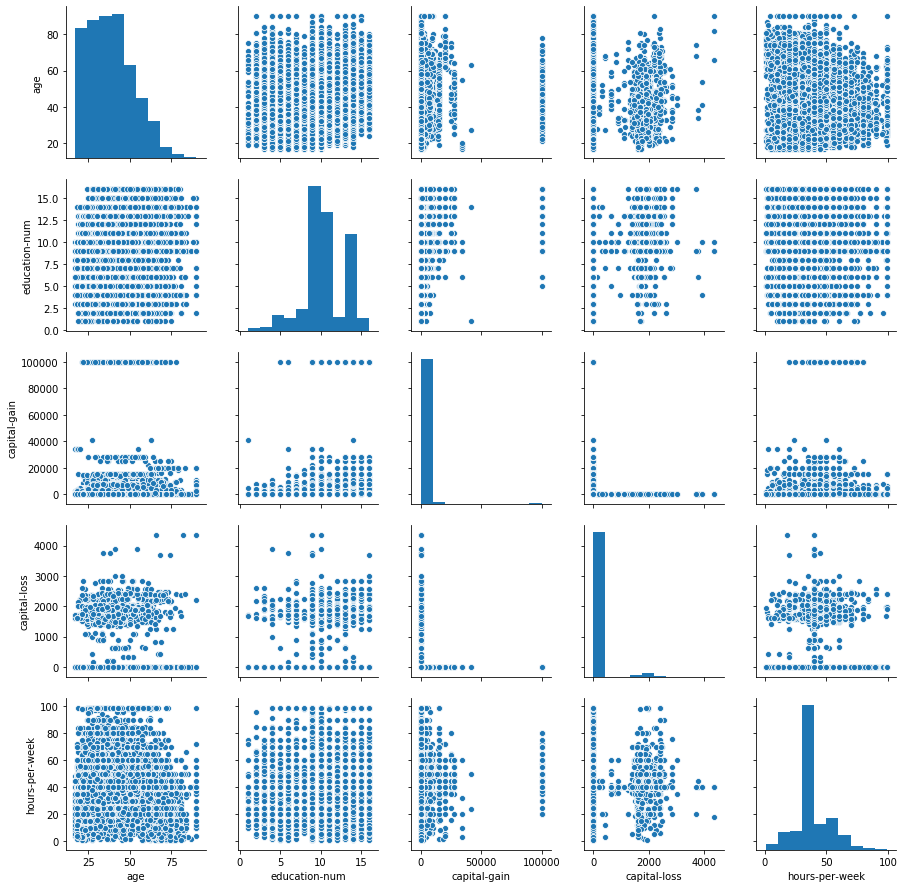

In [15]:
sns.pairplot(data);

In [16]:
# transformation des male en 0 et female en 1
data.sex = data.sex.map({'Male': 0, 'Female': 1})

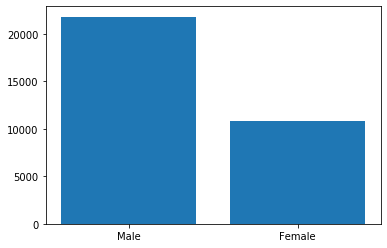

In [17]:
# proportion hommes/femmes
vals = df["sex"].value_counts()
plt.bar(vals.index,vals);

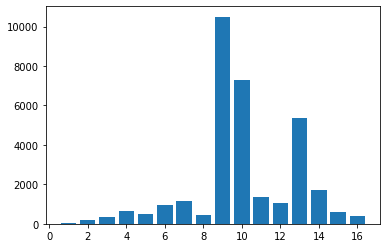

In [18]:
# visualisation des niveaux d'études
vals = data["education-num"].value_counts()
plt.bar(vals.index,vals);

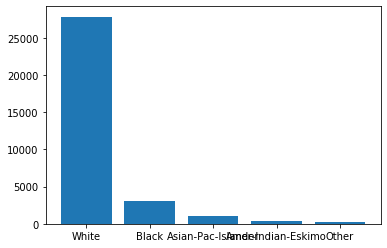

In [19]:
#visualisation des "races"
vals = data["race"].value_counts()
plt.bar(vals.index,vals);

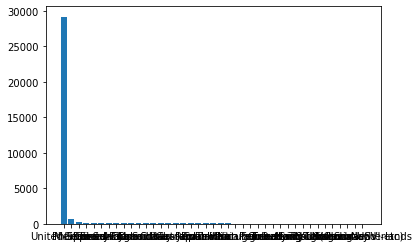

In [20]:
# visualisation des country d'origines. USA en grosse majorité
vals = data["native-country"].value_counts()
plt.bar(vals.index,vals);

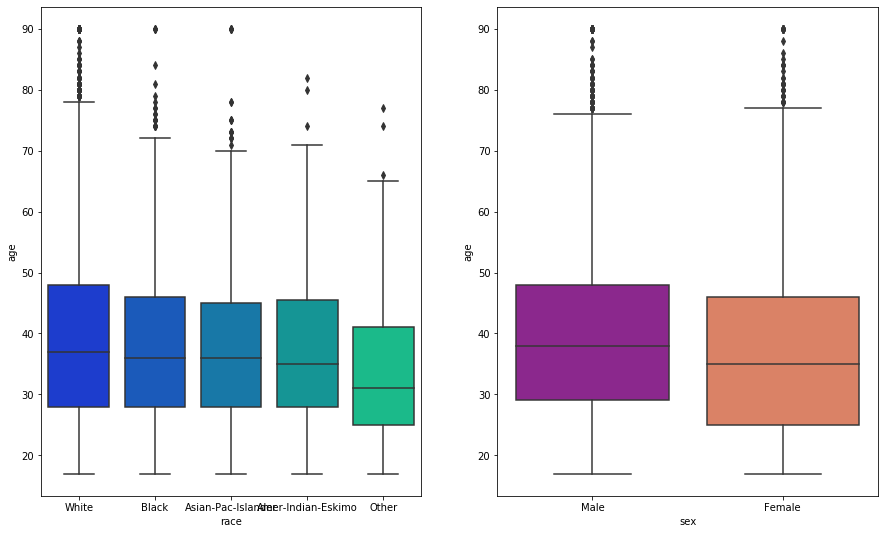

In [21]:
# race  en fontion de l'age et sex en fonciton de l'age
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 9))
sns.boxplot(x='race',y='age',data=df,palette='winter',ax=ax1)
sns.boxplot(x='sex',y='age',data=df,palette='plasma',ax=ax2);

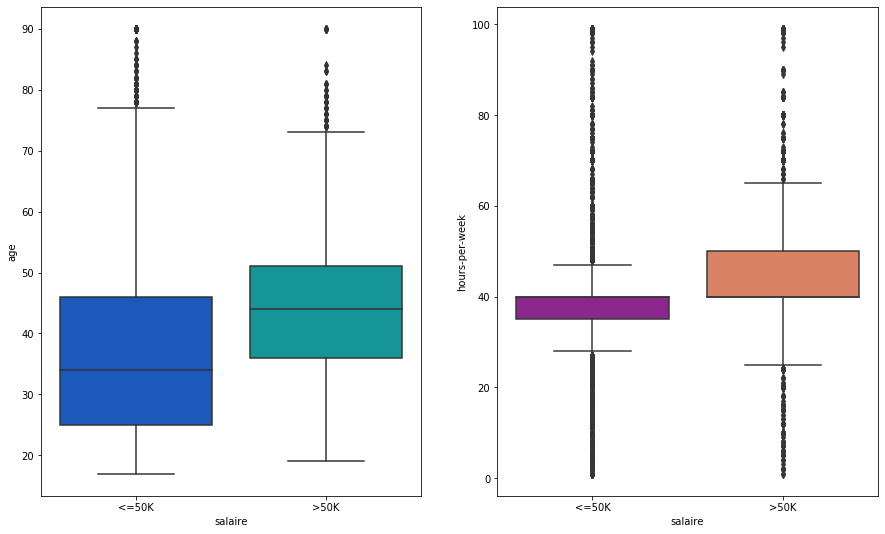

In [22]:
# salaire en fonction de l'age et du nombre d'heures travaillées
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 9))
sns.boxplot(x='salaire',y='age',data=df,palette='winter',ax=ax1)
sns.boxplot(x='salaire',y='hours-per-week',data=df,palette='plasma',ax=ax2);

In [23]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salaire
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,1,15024,0,40,United-States,>50K


In [24]:
# les dummies en passant par des variables intermédiaires et en supprimant direct une colonne
temp1 = pd.get_dummies(data['workclass'],drop_first=True)
temp2 = pd.get_dummies(data['education'],drop_first=True)
temp3 = pd.get_dummies(data['marital-status'],drop_first=True)
temp4 = pd.get_dummies(data['occupation'],drop_first=True)
temp5 = pd.get_dummies(data['relationship'],drop_first=True)
temp6 = pd.get_dummies(data['race'],drop_first=True)
temp7 = pd.get_dummies(data['native-country'],drop_first=True)

In [25]:
# et op on concat tout ça
data = pd.concat([data,temp1,temp2,temp3,temp4,temp5,temp6,temp7],axis=1)

In [26]:
# ca drop dans tous les sens
data.drop(['workclass','education','marital-status','occupation','relationship','race','native-country'],axis=1,inplace=True)

In [27]:
# transformation des salaires en -1 et 1 car on a juste inférieur et supérieur à 50k
data.salaire = data.salaire.map({'<=50K': -1, '>50K': 1})

In [28]:
# et aller, c'est repartit pour du drop
# data.drop(['capital-gain','capital-loss'],axis=1,inplace=True)
# non, finalement on va pas droper ça trop vite


In [29]:
data.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,salaire,Local-gov,Never-worked,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,13,0,2174,0,40,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,0,13,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,0,40,-1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,0,40,-1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,1,0,0,40,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# on fait notre joli petit X et notre y
y = data['salaire']
X = data.drop('salaire',axis=1)

In [31]:
# découpage des train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [32]:
# Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
# Instanciation et entraînement du modèle
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression(solver='liblinear')
reglog.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# Prédictions sur le test set
y_pred = reglog.predict(X_test)

In [35]:
# Accuracy score --> plus de 85 %
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8537034762314212


In [36]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.89      0.92      0.91      6303
           1       0.70      0.61      0.65      1838

    accuracy                           0.85      8141
   macro avg       0.80      0.77      0.78      8141
weighted avg       0.85      0.85      0.85      8141



In [37]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[5824  479]
 [ 712 1126]]


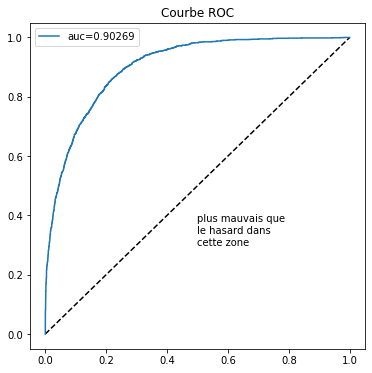

In [38]:
# Courbe ROC
from sklearn.metrics import roc_curve, auc
proba = reglog.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, proba[:, 1], pos_label=1, drop_intermediate=False)

fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.plot([0, 1], [0, 1], 'k--')
# aucf = roc_auc_score(y_test == clr.classes_[0], probas[:, 0]) # première méthode
aucf = auc(fpr, tpr)  # seconde méthode
ax.plot(fpr, tpr, label='auc=%1.5f' % aucf)
ax.set_title('Courbe ROC')
ax.text(0.5, 0.3, "plus mauvais que\nle hasard dans\ncette zone")
ax.legend();

In [39]:
# Coefficients
coef = pd.DataFrame(np.concatenate([reglog.intercept_.reshape(-1,1), reglog.coef_],axis=1),
             index = ["Coefficients"],
             columns = ["constante"]+list(X.columns)).T

coef["OR"] = np.exp(coef.Coefficients)
coef["1/OR"] = np.exp(-coef.Coefficients)
coef.head(50)

,Coefficients,OR,1/OR
constante,-2.052808,0.128374,7.789742
age,0.317439,1.373606,0.728011
education-num,0.534974,1.707403,0.585685
sex,-0.398565,0.671283,1.489685
capital-gain,2.350204,10.487712,0.095350
capital-loss,0.260587,1.297692,0.770599
hours-per-week,0.382153,1.465436,0.682391
Local-gov,-0.053492,0.947914,1.054948
Never-worked,-0.083808,0.919608,1.087420
Private,-0.003610,0.996396,1.003617


In [40]:
# coef de la fin
coef.tail(50)

,Coefficients,OR,1/OR
Transport-moving,0.015984,1.016112,0.984143
Not-in-family,0.142513,1.153168,0.867176
Other-relative,-0.062275,0.939624,1.064255
Own-child,-0.320023,0.726133,1.377159
Unmarried,0.057212,1.058880,0.944394
Wife,0.305271,1.356992,0.736924
Asian-Pac-Islander,0.110756,1.117122,0.895158
Black,0.117161,1.124300,0.889442
Other,0.013934,1.014032,0.986162
White,0.175586,1.191944,0.838966


In [41]:
# cross_val_score en 5 découpes, on voit la moyenne proche de 85% pour les 5
from sklearn.model_selection import cross_val_score
cross_val_score(reglog, X, y, cv=5)

array([0.84630739, 0.84628378, 0.85058354, 0.85350123, 0.85227273])

In [42]:
from sklearn.metrics import make_scorer, r2_score
cross_val_score(reglog, X, y, cv=5, scoring='r2')

array([0.15954638, 0.15913951, 0.18266008, 0.19862047, 0.1919003 ])

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], "penalty":["l1","l2"]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\utilisateur\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\utilisateur\Anac

Best cross-validation score: 0.85
Best parameters:  {'C': 10, 'penalty': 'l2'}
Best estimator:  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


ValueError: cannot reshape array of size 2344320 into shape (60000,newaxis)

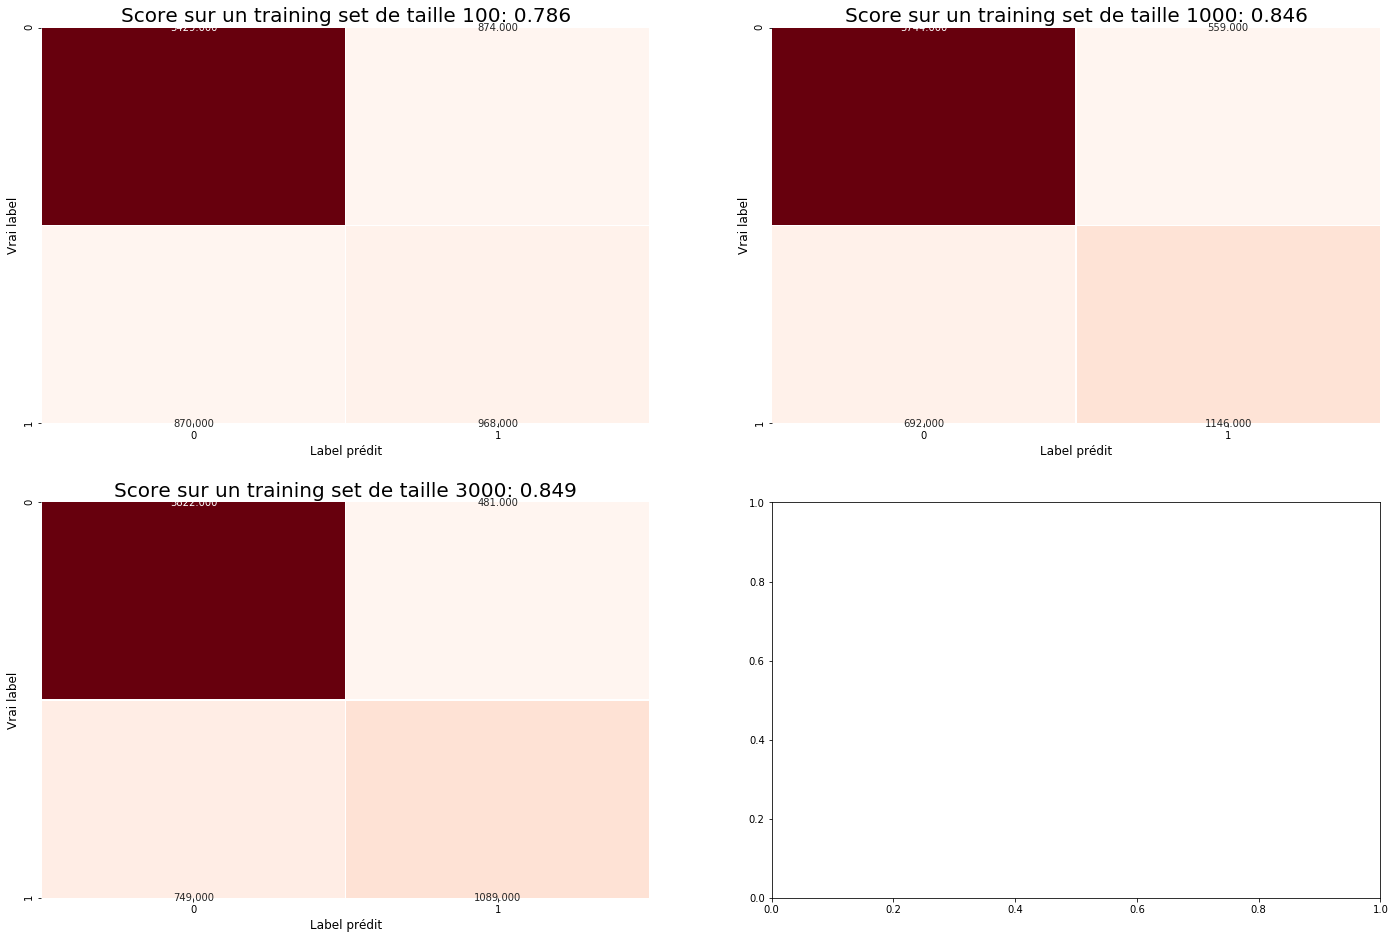

In [45]:
plt.figure(figsize = (24,16));

sample_size = [100, 1000, 3000, 60000]
for i,s in enumerate(sample_size):
    plt.subplot(2,2,i+1)
    X = X_train[:s].reshape(s,-1)
    y = y_train[:s]
    reglog.fit(X, y)
    pred = reglog.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    #cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, cmap = 'Reds', cbar = False)
    accuracyString = 'Score sur un training set de taille {:g}: {:.3f}'.format(s, reglog.score(X_test, y_test)) 
    plt.title(accuracyString, size = 20)
    plt.xlabel('Label prédit', fontsize = 12)
    plt.ylabel('Vrai label', fontsize = 12);